In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US['salary_year_avg'].sample(10)

558272    125000.0
234737     80000.0
587611     72500.0
671803     65000.0
149945    132368.0
731929     87500.0
171448     55000.0
410067     97500.0
367770    150000.0
230623    350000.0
Name: salary_year_avg, dtype: float64

<Axes: >

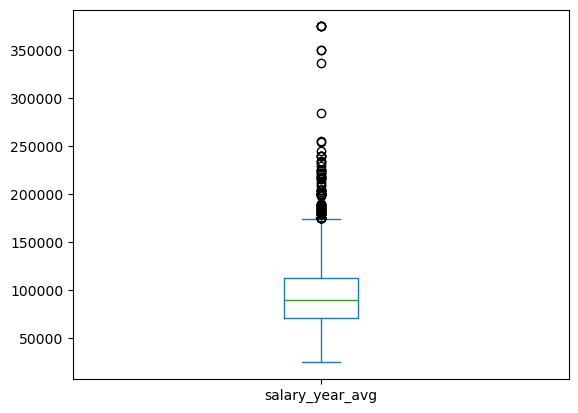

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box')

<Axes: >

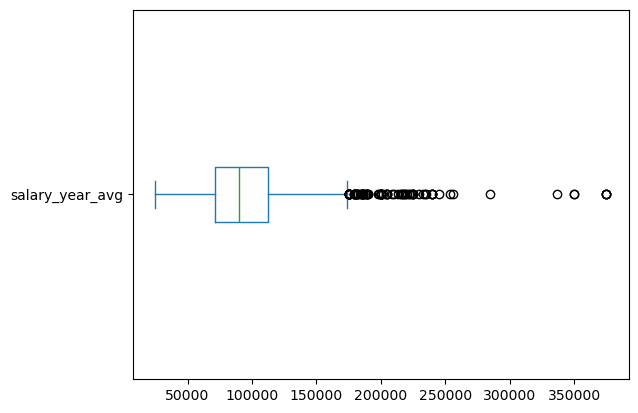

In [5]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

In [6]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

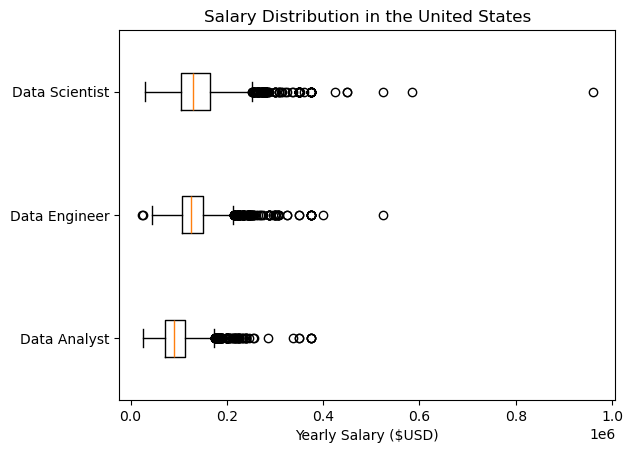

In [9]:
# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

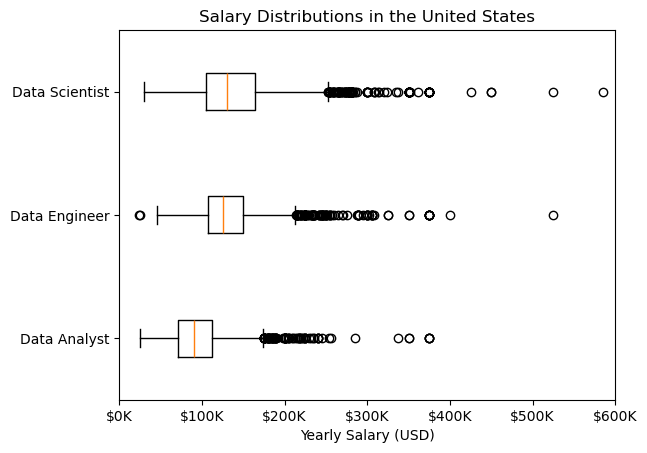

In [10]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

🟩 Data Scientist Hourly Salary Box Plot (2.18.1) - Problem
Matplotlib Box Plots
Problem Statement:
Create a box plot to visualize the distribution of salary_hour_avg for Data Scientist job postings in the United States. Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.

In [11]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

In [12]:
df_DS_US = df_DS_US.dropna(subset='salary_hour_avg')

In [19]:
#combine everything into one line
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_hour_avg']).copy()

In [17]:
df_DS_US['salary_hour_avg'].sample(10)

404214     53.500000
544898     45.000000
186521     35.000000
723565     82.500000
416610    137.500000
44069      40.779999
599451     51.239998
666410     22.000000
287447     39.500000
56449      43.709999
Name: salary_hour_avg, dtype: float64

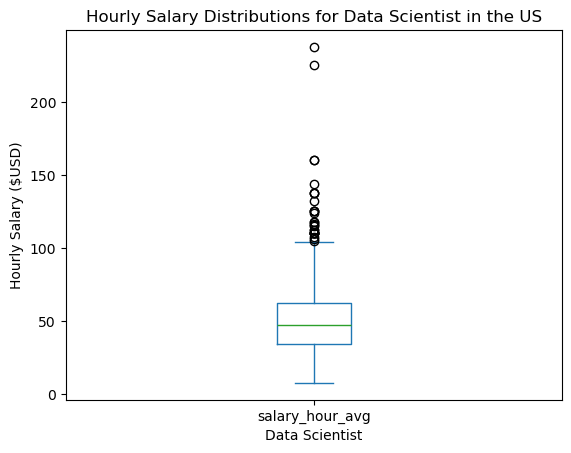

In [18]:
df_DS_US['salary_hour_avg'].plot(kind='box')
plt.title('Hourly Salary Distributions for Data Scientist in the US')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.show()

🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2) - Problem
Matplotlib Box Plots
Problem Statement:
Create a box plot to compare the distribution of salary_hour_avg for Data Analyst job postings in the United States and Canada.

Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
Use list comprehension to create a list of DataFrames for each country.
Use the plt.boxplot() function to plot this list and specify the labels as countries.
Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.
Code Needed:
countries = ['United States', 'Canada']

In [20]:
countries = ['United States', 'Canada']

#df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
df_DA_UC = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg']).copy()

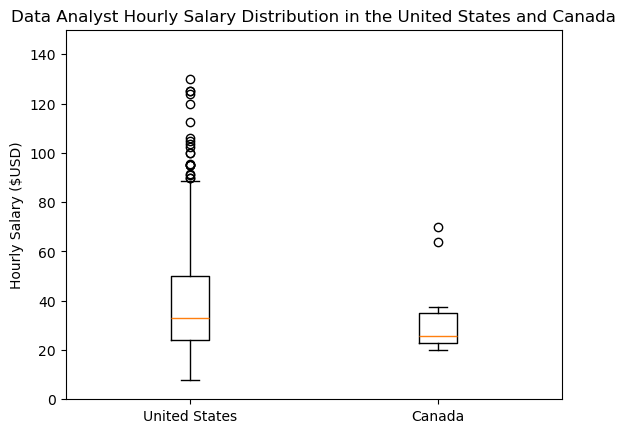

In [22]:
country_list = [df_DA_UC[df_DA_UC['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(country_list, tick_labels=countries)
plt.title('Data Analyst Hourly Salary Distribution in the United States and Canada')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)

plt.show()

🟥 Comparison of Hourly Salaries in Canada (2.18.3) - Problem
Matplotlib Box Plots
Problem Statement:
Create a box plot to compare the distribution of salary_hour_avg for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.
Label the x-axis as 'Job Title' and format the y-axis to have '$' before the number then label it as 'Hourly Salary (USD)'.
Code Needed:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [23]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_CA = df[(df['job_country'] == 'Canada') & (df['job_title_short'].isin(job_titles))].dropna(subset='salary_hour_avg').copy()

In [ ]:
df_CA.sample(2)

In [25]:
#list of hourly salaries for each job title
job_list = [df_CA[df_CA['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

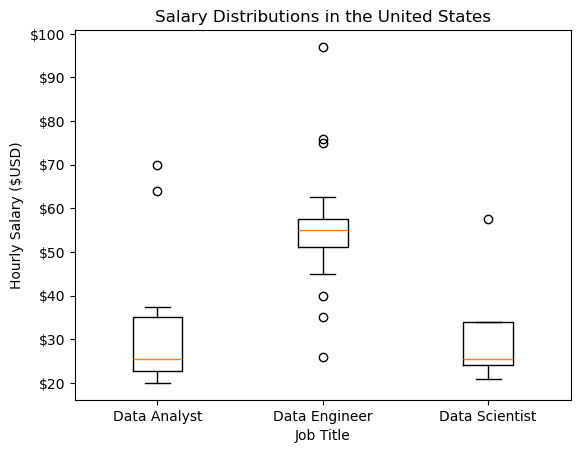

In [34]:
plt.boxplot(job_list, tick_labels=job_titles)
plt.title('Salary Distributions in the United States')
plt.ylabel('Hourly Salary ($USD)')
plt.xlabel('Job Title')

# Format y-axis
ticks_y = plt.FuncFormatter(lambda y, pos: f'${int(y)}')
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.show()


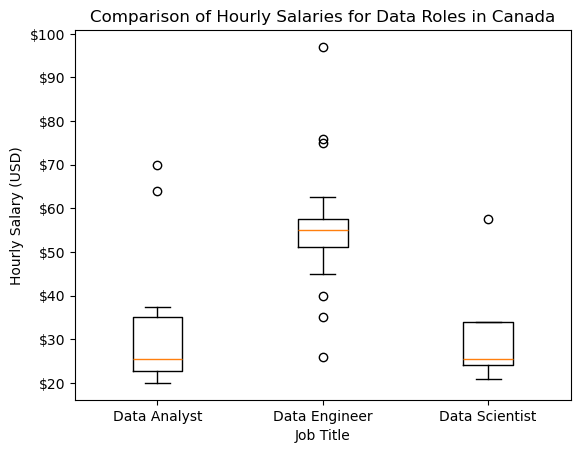

In [36]:
#Final Solution:
# Plot charts
fig, ax = plt.subplots()
ax.boxplot(job_list, tick_labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()
